## Раздел 2. Изучение и анализ данных
### 2.1 Загрузка и предобработка данных

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# загрузка данных и предпросмотр

In [4]:
df1 = pd.read_csv('https://raw.githubusercontent.com/petrovalina93/diploma/main/Shanghai_AQI_and_Wheather_2014-2021.csv')
df1.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,0.0,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,3.0,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,26.0,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,24.0,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,12.0,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous


In [5]:
df2 = pd.read_csv('https://raw.githubusercontent.com/petrovalina93/diploma/ec207d16b85eaa378e902aa7acecdef70aedafbf/shanghai-air-quality.csv')
df2.head()

,date,pm25,pm10,o3,no2,so2,co
0,2021/1/5,76,43,28,13,1,6
1,2021/1/6,98,41,23,15,2,7
2,2021/1/7,101,60,20,9,2,7
3,2021/1/8,81,46,19,13,3,9
4,2021/1/9,80,57,20,24,4,10


In [6]:
# посмотрим состав и типы данных датасета

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2502 entries, 0 to 2501
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               2502 non-null   object 
 1   maxtempC           2502 non-null   float64
 2   mintempC           2502 non-null   float64
 3   totalSnow_cm       2502 non-null   float64
 4   sunHour            2502 non-null   float64
 5   uvIndex            2502 non-null   float64
 6   moon_illumination  2502 non-null   float64
 7   DewPointC          2502 non-null   float64
 8   FeelsLikeC         2502 non-null   float64
 9   HeatIndexC         2502 non-null   float64
 10  WindChillC         2502 non-null   float64
 11  WindGustKmph       2502 non-null   float64
 12  cloudcover         2502 non-null   float64
 13  humidity           2502 non-null   float64
 14  precipMM           2502 non-null   float64
 15  pressure           2502 non-null   float64
 16  tempC              2502 

In [8]:
# в датасете нет пустых значений
# тип данных в первом столбце приведем к формату datetime для удобства дальнейшей обработки

In [9]:
type(df1.date[0])

str

In [10]:
import datetime

In [11]:
df1['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in list(df1['date'])]

In [12]:
#  поменяем формат столбцов с целочисленными значения с float на int. 
# предварительно проверим по столбцам списки уникальных значений, чтобы убедится,что нет вещественных значений

In [13]:
df1['windspeedKmph'].unique() 

array([12., 14.,  6., 19., 15., 23., 16., 11.,  9.,  7., 18., 20., 22.,
       13., 21., 17., 25., 10., 24.,  8., 26.,  5.,  4., 27., 28., 33.,
       51.,  3., 29., 30., 40., 32.])

In [14]:
df1[['maxtempC', 'mintempC', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC','WindChillC',\
     'WindGustKmph', 'cloudcover', 'humidity', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'AQI']] =\
    df1[['maxtempC', 'mintempC', 'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC','WindChillC',\
         'WindGustKmph', 'cloudcover', 'humidity', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'AQI']]\
.astype(int)
df1.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
0,2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,...,0,43,0.0,1021.0,15,10,242,12,319,Hazardous
1,2014-01-02,14,7,0.0,8.7,4,2,4,11,13,...,3,60,0.0,1019.0,14,10,141,14,352,Hazardous
2,2014-01-03,16,9,0.0,8.7,4,10,3,11,12,...,26,55,0.0,1017.0,16,10,295,14,338,Hazardous
3,2014-01-04,10,4,0.0,5.5,2,17,3,7,9,...,24,68,0.1,1022.0,10,10,169,14,355,Hazardous
4,2014-01-05,10,3,0.0,8.7,3,24,3,9,9,...,12,66,0.0,1024.0,10,10,117,6,343,Hazardous


In [15]:
# базовые статистики

In [16]:
df1.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI
count,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000,2502.000000
mean,21.445643,15.049161,0.001679,9.620064,4.693845,46.268985,12.917666,19.448441,20.195843,18.068745,17.294964,46.630695,71.049960,1.838849,1016.412070,21.445643,9.539568,153.968425,12.639888,236.598721
std,8.507496,8.045625,0.040454,3.129641,1.739478,31.279000,8.897817,10.480134,9.673024,8.793790,6.671845,30.686734,13.363236,6.081774,8.930989,8.507496,1.296442,75.989626,4.497569,77.295047
min,-3.000000,-6.000000,0.000000,3.800000,1.000000,0.000000,-23.000000,-9.000000,-3.000000,-9.000000,4.000000,0.000000,18.000000,0.000000,986.000000,-3.000000,3.000000,8.000000,3.000000,95.000000
25%,14.000000,8.000000,0.000000,8.000000,3.000000,19.000000,6.000000,11.000000,12.000000,11.000000,13.000000,19.000000,63.000000,0.000000,1009.000000,14.000000,9.000000,99.000000,10.000000,162.000000
50%,23.000000,16.000000,0.000000,9.000000,5.000000,46.000000,13.000000,20.000000,20.000000,20.000000,16.000000,44.000000,73.000000,0.000000,1016.000000,23.000000,10.000000,144.000000,12.000000,237.000000
75%,28.000000,22.000000,0.000000,12.700000,6.000000,73.000000,21.000000,27.000000,27.000000,25.000000,21.000000,73.000000,81.000000,1.100000,1023.750000,28.000000,10.000000,201.000000,15.000000,310.000000
max,40.000000,31.000000,1.700000,14.500000,9.000000,100.000000,28.000000,45.000000,45.000000,36.000000,82.000000,100.000000,97.000000,126.800000,1039.000000,40.000000,20.000000,347.000000,51.000000,522.000000


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# посмотрим график колебания температур во времени на предмет наличия аномалий

<AxesSubplot:xlabel='date', ylabel='maxtempC'>

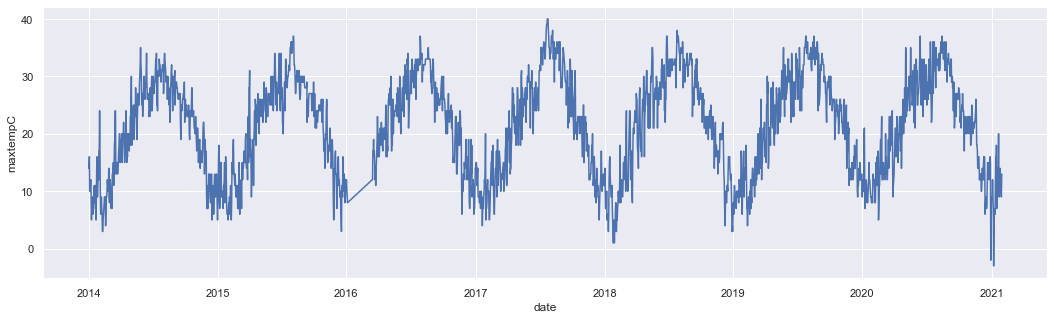

In [19]:
sns.set(rc={'figure.figsize':(18,5)})
sns.lineplot(x=df1.date, y=df1.maxtempC)

In [20]:
# можно отметить пик летних температур в 2017 году и в целом довольно жаркий летний сезон всех последующих лет,
# особенно холодную зиму 2021 года
# в начале 2016 года есть непонятный линейный участок, посмотрим эти данные отдельно

In [21]:
df1 [(df1 ['date'] < '2016-03-20') & ('2016-01-01'< df1['date'])].sort_values(by='date')

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
727,2016-01-04,8,4,0.0,5.5,2,28,0,4,7,...,59,66,0.2,1026.0,8,10,177,14,358,Hazardous
728,2016-03-14,12,4,0.0,10.2,2,36,3,6,9,...,26,70,0.0,1026.0,12,10,114,16,314,Hazardous
729,2016-03-15,12,3,0.0,10.2,2,44,2,6,9,...,41,64,0.0,1022.0,12,10,105,15,320,Hazardous
730,2016-03-16,17,9,0.0,11.6,4,51,7,12,13,...,18,69,0.0,1019.0,17,10,123,11,273,Very unhealthy
731,2016-03-17,17,9,0.0,7.4,3,58,12,13,14,...,63,89,0.1,1016.0,17,8,124,14,290,Very unhealthy
732,2016-03-18,19,13,0.0,6.0,4,65,14,16,16,...,89,86,0.0,1012.0,19,8,177,6,270,Very unhealthy
733,2016-03-19,16,9,0.0,10.3,3,73,11,13,13,...,68,88,0.2,1018.0,16,7,49,10,334,Hazardous


In [22]:
# видим пропуск в датам , данных за 10 недельс 5 янв. по 13 марта 2016 нет

In [23]:
datetime.datetime.strptime('2016-03-13', '%Y-%m-%d') - datetime.datetime.strptime('2016-01-04', '%Y-%m-%d') \
+ datetime.timedelta(days=1)

datetime.timedelta(days=70)

In [24]:
timedelta =  (df1['date'].sort_values()[(len(df1)-1)]) - (df1['date'].sort_values()[0]) + datetime.timedelta(days=1)
print('Промежуток между мин. и макс. датами - ', timedelta.days)
print( 'Всего строк-', len(df1))
print( 'Всего пропущено, дн.-', (int(timedelta.days)-len(df1)))

Промежуток между мин. и макс. датами -  2587
Всего строк- 2502
Всего пропущено, дн.- 85


In [25]:
# также видим, что есть ещё пропуски дат, искуственно заполнять их не будем,
# т.к. имеем достаточно по нескольким годам

In [26]:
# посмотроим визуализацию разброса значений аргументов,  проанализируем выбросы

<AxesSubplot:>

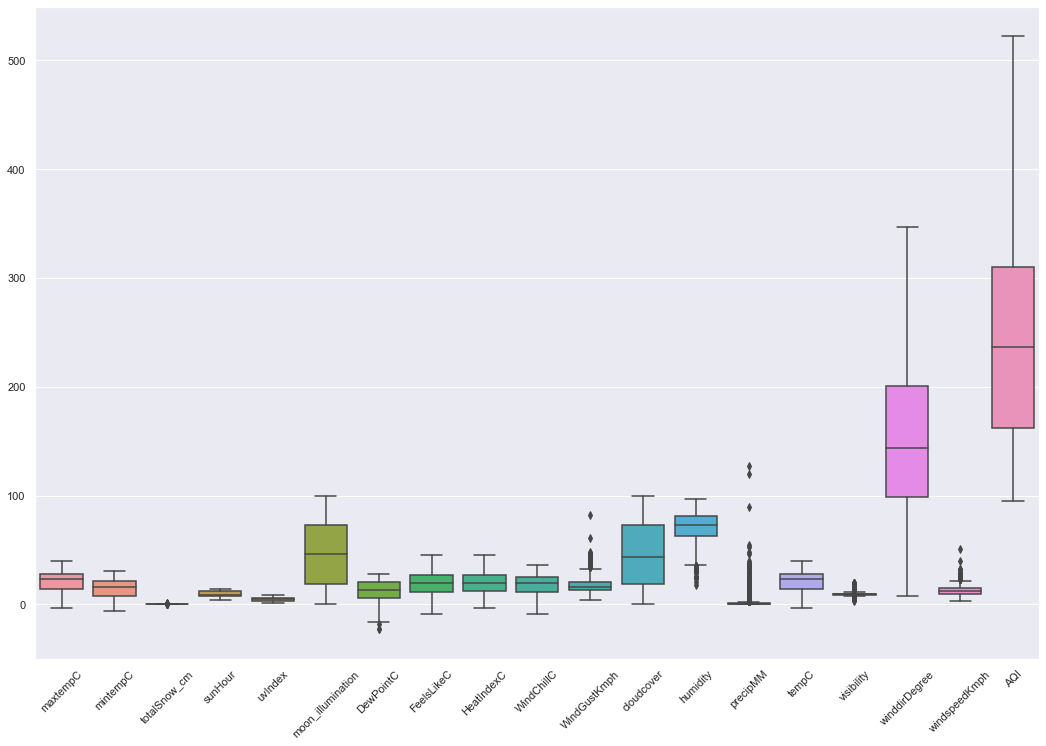

In [27]:
sns.set(rc={'figure.figsize':(18,12)})
plt.xticks(rotation=45)
sns.boxplot(data = df1.drop('pressure', axis=1))

<AxesSubplot:>

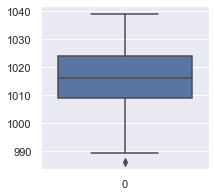

In [28]:
# давление вынесено отдельно, т.к. масштаб значений сильно больше остальных  
sns.set(rc={'figure.figsize':(3,3)})
sns.boxplot(data = df1['pressure'])

In [29]:
df1.columns

Index(['date', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
       'AQI', 'AQI_Explained'],
      dtype='object')

In [30]:
#  видим, что дней с большим количеством осадкаов мало, а снежных - крайне мало, но сами значения адекватные

In [31]:
sns.set(rc={'figure.figsize':(5,5)})

<AxesSubplot:>

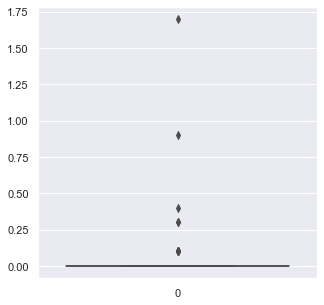

In [32]:
sns.boxplot(data = df1['totalSnow_cm'])

In [33]:
df1['totalSnow_cm'].quantile(0.995)

0.0

<AxesSubplot:>

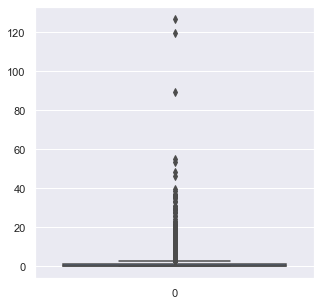

In [34]:
sns.boxplot(data = df1['precipMM'])

In [35]:
df1['precipMM'].quantile(0.99)

26.987999999999737

In [36]:
# сильные ветер и мощные порывы ветра также редки, значения адекватные, внешний вид диаграм очень схож, 
# поэтому в принципе столбец с порывами WindGust можем исключить как по сути дублирующий скорость ветра, но более "размазанный"

<AxesSubplot:>

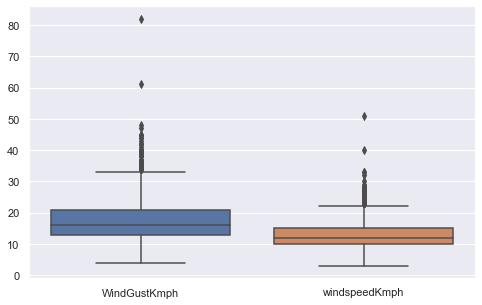

In [37]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data = df1[['WindGustKmph', 'windspeedKmph']])

In [38]:
df1[['WindGustKmph','windspeedKmph']].quantile(0.99)

WindGustKmph     37.99
windspeedKmph    26.00
Name: 0.99, dtype: float64

In [39]:
df1 = df1.drop('WindGustKmph', axis=1)

In [40]:
# столбец tempC дублирует maxtempC - исключим

In [41]:
df1 = df1.drop('tempC', axis=1)

In [42]:
# точка росы и влажность

<AxesSubplot:>

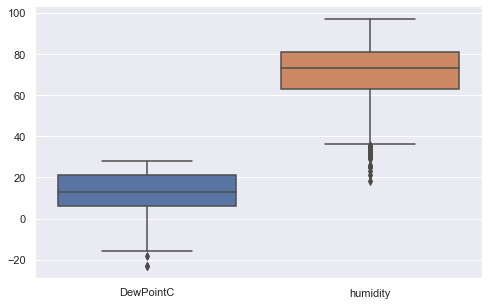

In [43]:
sns.boxplot(data = df1[['DewPointC','humidity']])

In [44]:
df1[['DewPointC','humidity']].quantile(0.01)

DewPointC    -8.0
humidity     33.0
Name: 0.01, dtype: float64

<AxesSubplot:>

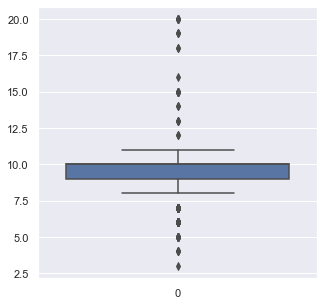

In [45]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(data = df1['visibility'])

In [46]:
#  отдельно выделим строки с какими-либо погодными аномалиями, выделив в отдельный датасет 

In [47]:
df1_anomaly = df1.loc[(df1['totalSnow_cm'] > df1['totalSnow_cm'].quantile(0.995)) | \
                      (df1['precipMM'] > df1['precipMM'].quantile(0.99)) | \
                     (df1['windspeedKmph'] > df1['windspeedKmph'].quantile(0.99)) |\
                     (df1['DewPointC'] < df1['DewPointC'].quantile(0.01)) |\
                     (df1['humidity'] < df1['humidity'].quantile(0.01))]
print('кол-во строк', len(df1_anomaly))
df1_anomaly

кол-во строк 82


,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained
39,2014-02-09,3,0,0.3,4.1,1,66,-2,-3,2,-3,89,75,0.5,1026.0,8,219,25,301,Hazardous
40,2014-02-10,3,-1,0.1,8.7,1,74,-5,-5,0,-5,55,66,0.2,1029.0,9,337,25,305,Hazardous
230,2014-08-19,22,21,0.0,8.2,5,36,22,22,25,22,92,96,27.0,1011.0,3,30,9,150,Unhealthy for sensitive groups
264,2014-09-22,24,22,0.0,7.4,5,0,20,25,25,23,78,87,8.1,1011.0,9,51,27,138,Unhealthy for sensitive groups
348,2014-12-16,5,1,0.0,8.7,2,29,-9,-1,4,-1,4,39,0.0,1032.0,10,315,27,332,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2021-01-08,1,-6,0.0,8.7,2,28,-23,-8,-2,-8,14,18,0.0,1033.0,10,311,18,188,Unhealthy
2480,2021-01-09,6,-4,0.0,8.7,2,20,-18,-1,2,-1,3,21,0.0,1031.0,10,281,13,200,Unhealthy
2481,2021-01-10,7,-2,0.0,8.7,2,13,-15,2,4,2,15,25,0.0,1031.0,10,228,7,270,Very unhealthy
2482,2021-01-11,6,0,0.0,8.7,1,6,-11,2,4,2,20,33,0.0,1030.0,10,303,12,322,Hazardous


In [48]:
# посмотрим распределение индекса качества воздуха для данной выборки в абсолютных единицах и по категориям

<AxesSubplot:xlabel='AQI', ylabel='Count'>

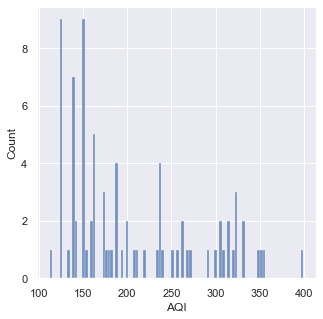

In [49]:
sns.histplot(df1_anomaly['AQI'], kde=False, bins=100) 

<AxesSubplot:xlabel='AQI_Explained', ylabel='Count'>

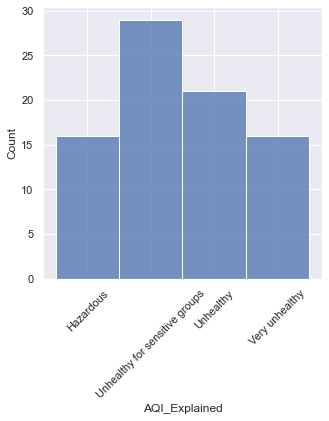

In [50]:
plt.xticks(rotation=45)
sns.histplot(df1_anomaly['AQI_Explained'], kde=False, bins=5) 

In [51]:
df1_anomaly['AQI_Explained'].value_counts()

Unhealthy for sensitive groups    29
Unhealthy                         21
Hazardous                         16
Very unhealthy                    16
Name: AQI_Explained, dtype: int64

In [52]:
df1_normal = pd.concat([df1,df1_anomaly]).drop_duplicates(keep=False)

<AxesSubplot:xlabel='AQI_Explained', ylabel='Count'>

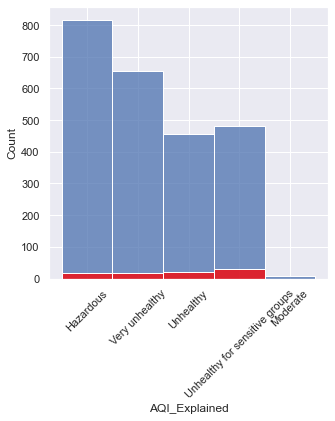

In [53]:
plt.xticks(rotation=45)
sns.histplot(df1_normal['AQI_Explained'], kde=False, bins=5) 
sns.histplot(df1_anomaly['AQI_Explained'], kde=False, bins=5, color='red') 

In [54]:
# при наложении графиков видим, что на общее распределение дни с аномальными условиями не будут оказывать сильного влияние, 
# наиболее заметен будет вклад в категории "Unhealthy for sensitive groups"

In [ ]:
# посмотрим влияние всех климатических показателей на значения AQI

In [150]:
# корреляционная матрица
df1.corr()['AQI']

maxtempC            -0.249822
mintempC            -0.354862
totalSnow_cm        -0.005168
sunHour             -0.024349
uvIndex             -0.236263
moon_illumination    0.011110
DewPointC           -0.329562
FeelsLikeC          -0.290128
HeatIndexC          -0.295424
WindChillC          -0.280302
cloudcover          -0.220535
humidity            -0.224250
precipMM            -0.144151
pressure             0.228836
visibility           0.095625
winddirDegree        0.221684
windspeedKmph       -0.176586
AQI                  1.000000
Name: AQI, dtype: float64

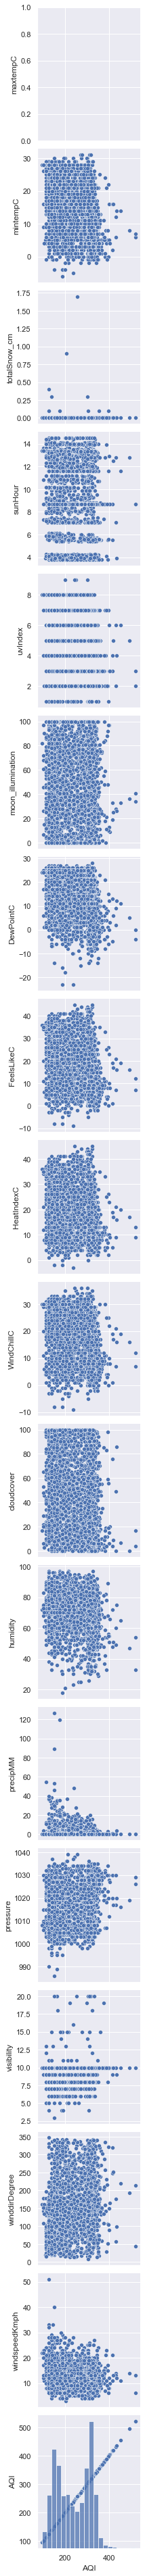

In [159]:
sns.pairplot(df1, x_vars='AQI', height=3)
# четких линейных зависимостей нет, нужен более подробный анализ

In [ ]:
# второй набор данных

In [55]:
df2

,date,pm25,pm10,o3,no2,so2,co
0,2021/1/5,76,43,28,13,1,6
1,2021/1/6,98,41,23,15,2,7
2,2021/1/7,101,60,20,9,2,7
3,2021/1/8,81,46,19,13,3,9
4,2021/1/9,80,57,20,24,4,10
...,...,...,...,...,...,...,...
2498,2019/1/1,,34,26,13,4,3
2499,2017/9/10,,26,33,16,3,9
2500,2016/3/14,,61,51,13,8,7
2501,2015/1/1,,55,24,19,15,6


In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2503 non-null   object
 1    pm25   2503 non-null   object
 2    pm10   2503 non-null   object
 3    o3     2503 non-null   object
 4    no2    2503 non-null   object
 5    so2    2503 non-null   object
 6    co     2503 non-null   object
dtypes: object(7)
memory usage: 137.0+ KB


In [57]:
# пропусков судя по результату нет, но визуально видим их в конце датасета в первом столбце!

In [58]:
# даты  приведем к формату datetime для удобства дальнейшей обработки
df2['date'] = [datetime.datetime.strptime(date, '%Y/%m/%d') for date in list(df2['date'])]

In [59]:
df2.columns

Index(['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co'], dtype='object')

In [ ]:
# попробуем привести остальные столбцы к числовому формату
# df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(int)

In [ ]:
# ловим ошибку, т.к. есть пустые строки вместо значений

In [61]:
df2.loc[(df2[' pm25'] == ' ') | (df2[' pm10'] == ' ') | (df2[' o3'] == ' ') | (df2[' no2'] == ' ')\
        | (df2[' so2'] == ' ') | (df2[' co'] == ' ')]

,date,pm25,pm10,o3,no2,so2,co
26,2021-01-31,69,,,,,
100,2020-12-14,192,21,21,11,,7
243,2020-04-30,111,53,,23,3,6
244,2020-05-01,116,38,,13,2,5
245,2020-05-02,98,60,,26,2,8
...,...,...,...,...,...,...,...
2498,2019-01-01,,34,26,13,4,3
2499,2017-09-10,,26,33,16,3,9
2500,2016-03-14,,61,51,13,8,7
2501,2015-01-01,,55,24,19,15,6


In [62]:
# таких строк всего 118, заменим все подобные значения на пустые , а затем переведем столбцы в float 
# ( т.к. Nan не конвертируетс в int)

In [63]:
df2 = df2.replace({' pm25':{' ': np.nan}, ' pm10':{' ': np.nan}, ' o3':{' ': np.nan}, ' no2':{' ': np.nan}, ' so2':{' ': np.nan}, ' co':{' ': np.nan}})
df2

,date,pm25,pm10,o3,no2,so2,co
0,2021-01-05,76,43,28,13,1,6
1,2021-01-06,98,41,23,15,2,7
2,2021-01-07,101,60,20,9,2,7
3,2021-01-08,81,46,19,13,3,9
4,2021-01-09,80,57,20,24,4,10
...,...,...,...,...,...,...,...
2498,2019-01-01,NaN,34,26,13,4,3
2499,2017-09-10,NaN,26,33,16,3,9
2500,2016-03-14,NaN,61,51,13,8,7
2501,2015-01-01,NaN,55,24,19,15,6


In [64]:
df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(float)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2503 non-null   datetime64[ns]
 1    pm25   2496 non-null   float64       
 2    pm10   2495 non-null   float64       
 3    o3     2398 non-null   float64       
 4    no2    2496 non-null   float64       
 5    so2    2489 non-null   float64       
 6    co     2495 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 137.0 KB


In [65]:
# теперь выдача корректна . можем вывести статистики и посмотреть "ящики с усами"

In [72]:
# стоит ли эти значения на что-то заменять??? может попробовать как-то найти наиболее похожие дни,
# но без пропуска и заполнить недостающие значения по аналогии??? косинусное расстояние в numpy??
# заменять нулями, средним и т.п. по-моему в этом случае нет смысла

In [ ]:
# посмотрев корреляцию между признаками, можем отметить не сильно выраженную прямую зависимость
# pm10 c no2 и co, а также между no2 и co

In [128]:
df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].corr()

,pm25,pm10,o3,no2,so2,co
pm25,1.000000,0.528668,0.036736,0.437959,0.396485,0.350222
pm10,0.528668,1.000000,0.222910,0.637666,0.604809,0.643898
o3,0.036736,0.222910,1.000000,-0.118441,-0.079667,-0.055827
no2,0.437959,0.637666,-0.118441,1.000000,0.567851,0.620587
so2,0.396485,0.604809,-0.079667,0.567851,1.000000,0.492422
co,0.350222,0.643898,-0.055827,0.620587,0.492422,1.000000


<AxesSubplot:>

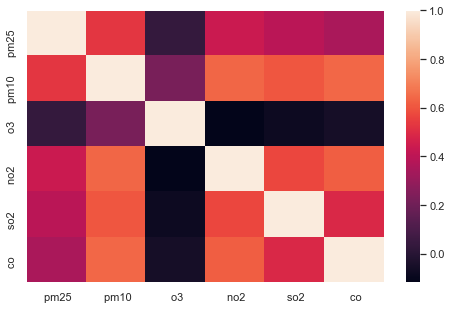

In [131]:
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df2[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].corr())

In [66]:
df2.describe()

,pm25,pm10,o3,no2,so2,co
count,2496.000000,2495.000000,2398.000000,2496.000000,2489.000000,2495.000000
mean,106.110176,47.715832,43.712677,19.985978,4.798313,6.027255
std,40.624261,20.659782,22.304984,9.593554,3.750174,2.319001
min,27.000000,8.000000,4.000000,1.000000,1.000000,1.000000
25%,75.000000,33.000000,29.000000,13.000000,2.000000,4.000000
50%,101.000000,45.000000,38.000000,18.000000,4.000000,6.000000
75%,133.000000,59.000000,52.000000,25.000000,6.000000,7.000000
max,409.000000,164.000000,143.000000,69.000000,37.000000,19.000000


<AxesSubplot:>

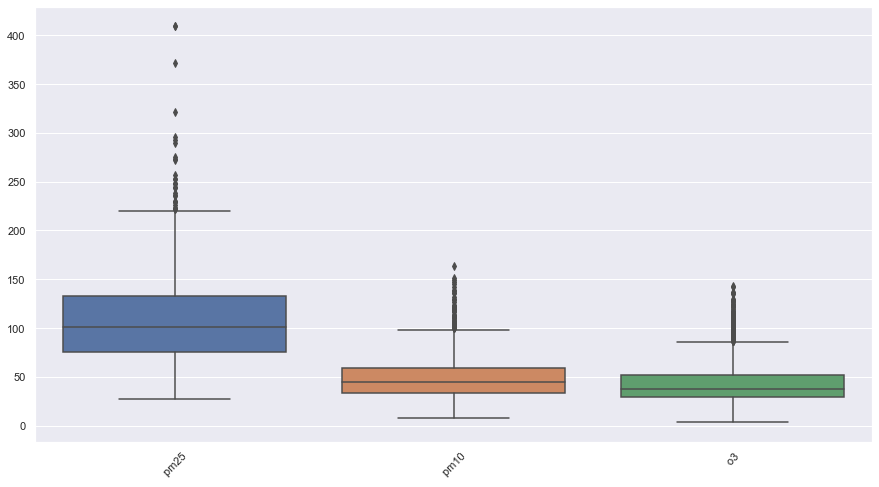

In [100]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xticks(rotation=45)
sns.boxplot(data = df2[[' pm25', ' pm10', ' o3']])

<AxesSubplot:>

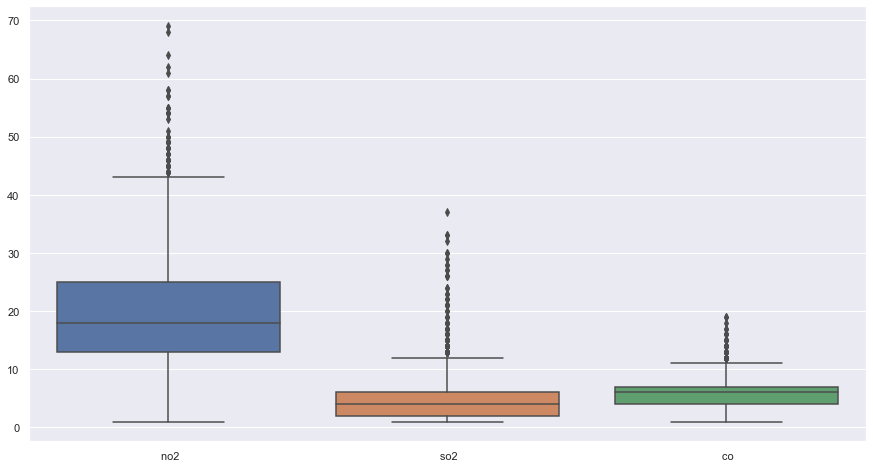

In [102]:
sns.boxplot(data = df2[[' no2', ' so2', ' co']])

In [68]:
# везде много выбросов в сторону высокого значения показателей

In [ ]:
# можно поместить их в отдельную выборку, сделать merge с аномальной выборкой из первого датасета 
# и оценить много ли общих дат получится

In [111]:
df2[' co'].quantile(0.97)

11.0

In [118]:
df2_anomaly = df2.loc[(df2[' pm25'] > df2[' pm25'].quantile(0.99)) | (df2[' pm10'] > df2[' pm10'].quantile(0.99)) | \
                     (df2[' o3'] > df2[' o3'].quantile(0.95)) | (df2[' no2'] > df2[' no2'].quantile(0.97)) |\
                     (df2[' so2'] > df2[' so2'].quantile(0.95)) | (df2[' co'] > df2[' co'].quantile(0.97))]
print('кол-во строк', len(df2_anomaly))
df2_anomaly

кол-во строк 332


,date,pm25,pm10,o3,no2,so2,co
5,2021-01-10,111.0,63.0,17.0,34.0,6.0,13.0
8,2021-01-13,117.0,79.0,18.0,43.0,4.0,8.0
9,2021-01-14,133.0,72.0,38.0,50.0,3.0,10.0
21,2021-01-26,69.0,28.0,24.0,27.0,1.0,12.0
63,2020-11-07,95.0,76.0,61.0,48.0,5.0,14.0
...,...,...,...,...,...,...,...
2481,2014-03-17,147.0,78.0,51.0,37.0,12.0,10.0
2482,2014-03-18,155.0,121.0,60.0,49.0,16.0,11.0
2483,2014-03-19,182.0,118.0,34.0,23.0,6.0,5.0
2501,2015-01-01,NaN,55.0,24.0,19.0,15.0,6.0


In [119]:
print(len(df2.loc[(df2[' pm25'] > df2[' pm25'].quantile(0.99))]))
print(len(df2.loc[(df2[' pm10'] > df2[' pm10'].quantile(0.99))]))
print(len(df2.loc[(df2[' o3'] > df2[' o3'].quantile(0.95))]))
print(len(df2.loc[(df2[' no2'] > df2[' no2'].quantile(0.97))]))
print(len(df2.loc[(df2[' so2'] > df2[' so2'].quantile(0.95))])) 
print(len(df2.loc[(df2[' co'] > df2[' co'].quantile(0.97))])) 

24
25
120
75
124
66


In [125]:
len(df2_anomaly.merge(df1_anomaly, how='inner', on='date'))

8

In [126]:
# пересечений аномалий погодных условий и очень высоких значений загрязнителей практически не пересекаются
# значит нужно искать менее очевидные зависомости исследуя связи конкретных признаков

In [69]:
# во втором датасете строк на одну больше, посмотрим какая дата лишняя

In [74]:
df = df1.merge(df2, how='outer', on='date')
df.iloc[-1]

date                 2021-01-31 00:00:00
maxtempC                             NaN
mintempC                             NaN
totalSnow_cm                         NaN
sunHour                              NaN
uvIndex                              NaN
moon_illumination                    NaN
DewPointC                            NaN
FeelsLikeC                           NaN
HeatIndexC                           NaN
WindChillC                           NaN
cloudcover                           NaN
humidity                             NaN
precipMM                             NaN
pressure                             NaN
visibility                           NaN
winddirDegree                        NaN
windspeedKmph                        NaN
AQI                                  NaN
AQI_Explained                        NaN
 pm25                                 69
 pm10                                NaN
 o3                                  NaN
 no2                                 NaN
 so2            

In [75]:
# крайней даты 2021-01-31 нет в первом датасете, не будем далее ее учитывать 
df = df1.merge(df2, how='inner', on='date')

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,winddirDegree,windspeedKmph,AQI,AQI_Explained,pm25,pm10,o3,no2,so2,co
0,2014-01-01,15,5,0.0,8.7,4,0,-1,11,12,...,242,12,319,Hazardous,NaN,121.0,29.0,57.0,30.0,14.0
1,2014-01-02,14,7,0.0,8.7,4,2,4,11,13,...,141,14,352,Hazardous,188.0,92.0,39.0,54.0,17.0,13.0
2,2014-01-03,16,9,0.0,8.7,4,10,3,11,12,...,295,14,338,Hazardous,170.0,105.0,21.0,55.0,32.0,12.0
3,2014-01-04,10,4,0.0,5.5,2,17,3,7,9,...,169,14,355,Hazardous,191.0,94.0,18.0,36.0,19.0,9.0
4,2014-01-05,10,3,0.0,8.7,3,24,3,9,9,...,117,6,343,Hazardous,176.0,53.0,13.0,37.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,2021-01-26,12,10,0.0,4.0,3,88,7,10,11,...,233,9,229,Very unhealthy,69.0,28.0,24.0,27.0,1.0,12.0
2498,2021-01-27,11,7,0.0,8.7,2,96,4,7,9,...,49,11,200,Unhealthy,90.0,50.0,38.0,16.0,2.0,9.0
2499,2021-01-28,10,4,0.0,8.7,3,100,-5,5,8,...,291,19,309,Hazardous,132.0,72.0,28.0,20.0,2.0,10.0
2500,2021-01-29,9,6,0.0,8.7,3,90,-9,5,7,...,188,10,320,Hazardous,146.0,62.0,24.0,13.0,3.0,6.0
